In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest,ttest_ind, ks_2samp
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
cohort_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/test_cohort_bmi.csv.gz"
combo_samples_file = "/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/british/BH_001/test_cohort.csv"

In [4]:
cohort_df = pd.read_csv(cohort_file, usecols=["sample_names", "bmi", "bmi_prs"])
combo_samples_df = pd.read_csv(combo_samples_file)

all_combo_samples = set("|".join(combo_samples_df.combo_samples.values).split("|"))
cohort_df["combo_carriers"] = cohort_df.sample_names.astype(str).isin(all_combo_samples)
combo_hit_pheno = cohort_df.loc[cohort_df.combo_carriers==True]
non_combo_hit_pheno = cohort_df.loc[cohort_df.combo_carriers==False]




# BMI comparison between individuals with and without the combinations in a non-white british cohort

/tmp/ipykernel_8940/4089866208.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_box = sns.boxplot(
/tmp/ipykernel_8940/4089866208.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Non\ncarrier", "Carrier"], rotation=45, ha="center", fontsize=14)


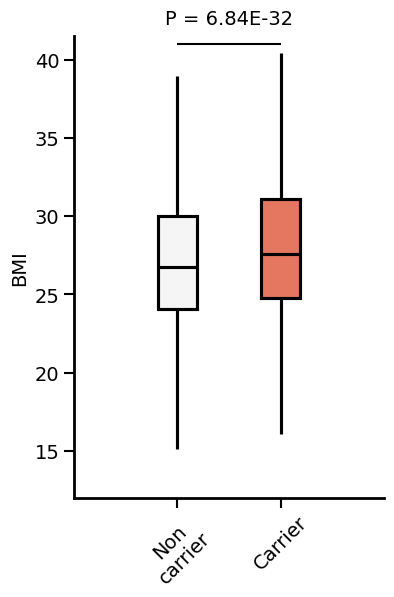

In [20]:
boxdf = cohort_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(4, 6))

# Box Plot
sns_box = sns.boxplot(
    data=boxdf,
    x="combo_carriers",
    y="bmi",
    order=[False, True],
    hue_order=[False,True],
    gap=0.5,
    palette= ["whitesmoke", sns.color_palette("Reds", 15).as_hex()[7]],
    dodge=False, width=0.75, linewidth=2.25, fliersize=0, capprops={'color':'none'}, 
    boxprops={ 'edgecolor':'k'},  # 'facecolor':'none',
    whiskerprops={'color':'k'}, medianprops={'color':'k'}) # 


# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
ax.set_xlim((-1, 2))
ax.set_ylim((12, 41.5))
# ax.set_ylabel('Percentage')
ax.set_xticklabels(["Non\ncarrier", "Carrier"], rotation=45, ha="center", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("BMI")
ax.hlines(41, 0, 1, color="k")
ttest_pval = ttest_ind(non_combo_hit_pheno.bmi, combo_hit_pheno.bmi, alternative="less").pvalue
ax.text(0.5, 42, f"P = {ttest_pval:.2E}", ha="center", va="bottom", fontsize=14)

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

In [13]:
# save_file = "/data6/deepro/ukb_bmi/3_characterization/data/british/nonbritish_comparison.pdf"
# save_pdf(save_file, fig)